# Week 03 - Data Prep and Exploratory Data Analysis (EDA)

## Functions, Methods, and Attributes

* df.shape: attribute; values that are precomputed
* df.head(): method; values are computed when called; belongs to a class, package, module, an object
* my_func(): function; usually created by programmer; set of instructions that perform a task

## Errors

In [1]:
import pandas as pd
# how to fix an error https://openmv.net/
# https://pandas.pydata.org/docs/reference/api/pandas.read_csv.html
grades = pd.read_csv('https://raw.githubusercontent.com/duttashi/learnr/master/data/misc/class-grades.csv')
# grades = pd.read_csv('https://raw.githubusercontent.com/duttashi/learnr/master/data/misc/class-grades.csv', on_bad_lines='warn')

ParserError: Error tokenizing data. C error: Expected 6 fields in line 22, saw 7


## Data Prep

### More Data Resources

* https://www.statsmodels.org/devel/datasets/index.html 
* https://en.wikipedia.org/wiki/List_of_datasets_for_machine-learning_research
* https://archive.ics.uci.edu/ml/datasets/Auto+MPG
* http://lib.stat.cmu.edu/datasets/
* https://www.kaggle.com/datasets
* https://registry.opendata.aws/
* https://dataportals.org/
* https://opendatamonitor.eu/frontend/web/index.php?r=dashboard%2Findex
* https://data.nasdaq.com/
* http://radar.oreilly.com/2011/01/journalist-data-tools.html
* https://www.reddit.com/r/datasets/
* https://stat.ethz.ch/R-manual/R-devel/library/datasets/html/00Index.html
* https://github.com/vincentarelbundock/Rdatasets 
* https://data.world/ 
* https://data.gov/
* https://registry.opendata.aws/
* https://cloud.google.com/datasets
* https://cloud.google.com/bigquery/public-data
* https://services.google.com/fh/files/misc/public_datasets_one_pager.pdf

### Cardinality of Features
* Uneven distribution of labels between train and test sets (some may appear in one set and not in other)
* Features with many labels dominate over those with fewer labels
* Many labels introduces noise with little or no information
* Reducing may help model performance
* Removing features with low cardinality my help model performance

In [2]:
import pandas as pd

grades = pd.read_csv('class-grades.csv')
print(grades.shape)
print(grades.info())
grades.head()

(99, 12)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99 entries, 0 to 98
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Prefix       99 non-null     int64  
 1   Assignment1  95 non-null     float64
 2   Tutorial     88 non-null     float64
 3   Midterm      92 non-null     float64
 4   Quiz         92 non-null     float64
 5   Final        96 non-null     float64
 6   TakeHome     92 non-null     object 
 7   Student      99 non-null     int64  
 8   Misc         1 non-null      float64
 9   Nothing      0 non-null      float64
 10  FinalGrade   99 non-null     int64  
 11  BiLabel      99 non-null     object 
dtypes: float64(7), int64(3), object(2)
memory usage: 9.4+ KB
None


,Prefix,Assignment1,Tutorial,Midterm,Quiz,Final,TakeHome,Student,Misc,Nothing,FinalGrade,BiLabel
0,5,57.14,34.09,64.38,64.38,52.50,F,1,0.0,NaN,54,pepper
1,8,95.05,105.49,67.50,67.50,68.33,B,1,NaN,NaN,81,pepper
2,8,83.70,83.17,30.00,30.00,48.89,D,1,NaN,NaN,55,salt
3,7,81.22,96.06,49.38,49.38,80.56,B,1,NaN,NaN,71,salt
4,8,91.32,NaN,95.00,95.00,73.89,B,1,NaN,NaN,89,salt


In [3]:
# features with only one value (constant)
constant_features = [
    feat for feat in grades.columns if len(grades[feat].unique()) == 1
]

constant_features

['Student', 'Nothing']

In [4]:
# features with very few values (quasi constant)
few_features = [
    feat for feat in grades.columns if len(grades[feat].fillna(0).unique()) == 1
]

few_features

['Student', 'Misc', 'Nothing']

In [5]:
# quasi constant features vs. binary features
for feat in grades.columns.sort_values():
    if (len(grades[feat].unique()) < 3):
        print(grades[feat].value_counts(dropna=False))

salt      51
pepper    48
Name: BiLabel, dtype: int64
NaN    98
0.0     1
Name: Misc, dtype: int64
NaN    99
Name: Nothing, dtype: int64
1    99
Name: Student, dtype: int64


### Duplications

In [6]:
# check of duplications
duplicated_feat = []
for i in range(0, len(grades.columns)):
    orig = grades.columns[i]

    for dupe in grades.columns[i + 1:]:
        if grades[orig].equals(grades[dupe]):
            duplicated_feat.append(dupe)
            
duplicated_feat

['Quiz']

### Missing Values

Missing data cause problems because most statistical procedures require a value for each variable. When a data set is incomplete, the data analyst has to decide how to deal with it.

https://www.theanalysisfactor.com/causes-of-missing-data/<br />
https://www.theanalysisfactor.com/when-listwise-deletion-works/

* MCAR: Missing Completely at Random
    * Probability of missing is same for all cases
    * I tripped and broke the test tubes I was carrying
    * Missing because not sampled
* MNAR: Missing Not at Random
    * Probability of missing is not the same for all cases
    * Data are missing on IQ and only the people with low IQ values have missing observations for this variable
    * Missing from public opinion because respondent maybe inhibited or have bias
* MAR: Mising at Random
    * Probability of missing is the same only within groups
    * Probability of sample depends on some known property
    * Only younger people have missing values for IQ

https://stefvanbuuren.name/fimd/sec-MCAR.html<br />
https://www.iriseekhout.com/post/2022-06-28-missingdatamechanisms/

### Complete-Case Analysis (CCA)

* Aka Listwise deletion
* Reduces sample size
* Can reduce the statistical efficiency of estimates

In [7]:
import pandas as pd

houses = pd.read_csv('https://raw.githubusercontent.com/gitmystuff/INFO4050/main/Datasets/house-prices.csv') 
houses.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [8]:
# delete rows with missing values
print(houses.shape)
print(houses.dropna().shape)

(1460, 81)
(0, 81)


### Any vs All

In [9]:
# count nulls
grades.isnull().sum()

Prefix          0
Assignment1     4
Tutorial       11
Midterm         7
Quiz            7
Final           3
TakeHome        7
Student         0
Misc           98
Nothing        99
FinalGrade      0
BiLabel         0
dtype: int64

In [10]:
# drop columns with null values https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.dropna.html
print(grades.shape)
grades.dropna(how='all', axis='columns', inplace=True) # 1
print(grades.shape)

(99, 12)
(99, 11)


In [11]:
# drop rows with null values
print(grades.shape)
grades.dropna(how='any', axis='index', inplace=True) # 0
print(grades.shape)

(99, 11)
(1, 11)


In [12]:
# start over
grades = pd.read_csv('class-grades.csv')
print(grades.shape)
print(grades.head())

(99, 12)
   Prefix  Assignment1  Tutorial  Midterm   Quiz  Final TakeHome  Student  \
0       5        57.14     34.09    64.38  64.38  52.50        F        1   
1       8        95.05    105.49    67.50  67.50  68.33        B        1   
2       8        83.70     83.17    30.00  30.00  48.89        D        1   
3       7        81.22     96.06    49.38  49.38  80.56        B        1   
4       8        91.32       NaN    95.00  95.00  73.89        B        1   

   Misc  Nothing  FinalGrade BiLabel  
0   0.0      NaN          54  pepper  
1   NaN      NaN          81  pepper  
2   NaN      NaN          55    salt  
3   NaN      NaN          71    salt  
4   NaN      NaN          89    salt  


In [13]:
# drop columns used for demonstration purposes
grades.drop(['Student', 'Misc', 'Nothing'], axis=1, inplace=True)
print(grades.shape)
print(grades.head())

(99, 9)
   Prefix  Assignment1  Tutorial  Midterm   Quiz  Final TakeHome  FinalGrade  \
0       5        57.14     34.09    64.38  64.38  52.50        F          54   
1       8        95.05    105.49    67.50  67.50  68.33        B          81   
2       8        83.70     83.17    30.00  30.00  48.89        D          55   
3       7        81.22     96.06    49.38  49.38  80.56        B          71   
4       8        91.32       NaN    95.00  95.00  73.89        B          89   

  BiLabel  
0  pepper  
1  pepper  
2    salt  
3    salt  
4    salt  


## Exploratory Data Analysis

### Train Test Split

In [14]:
# train test split
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(grades.drop('FinalGrade', axis=1), grades['FinalGrade'], test_size=.2, random_state=42)
print(X_train.shape)
print(X_test.shape)

(79, 8)
(20, 8)


In [15]:
# info
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 79 entries, 49 to 51
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Prefix       79 non-null     int64  
 1   Assignment1  75 non-null     float64
 2   Tutorial     69 non-null     float64
 3   Midterm      74 non-null     float64
 4   Quiz         74 non-null     float64
 5   Final        76 non-null     float64
 6   TakeHome     75 non-null     object 
 7   BiLabel      79 non-null     object 
dtypes: float64(5), int64(1), object(2)
memory usage: 5.6+ KB


In [16]:
# brief statistics
X_train.describe()

,Prefix,Assignment1,Tutorial,Midterm,Quiz,Final
count,79.000000,75.000000,69.000000,74.000000,74.000000,76.000000
mean,7.367089,87.169200,91.635217,65.870270,65.870270,69.353289
std,0.949726,10.574944,12.590742,20.356679,20.356679,19.200771
min,4.000000,53.360000,57.320000,28.120000,28.120000,28.060000
25%,7.000000,82.460000,86.850000,49.847500,49.847500,52.915000
50%,8.000000,91.280000,94.360000,63.750000,63.750000,66.250000
75%,8.000000,95.050000,100.580000,81.250000,81.250000,85.140000
max,8.000000,100.830000,108.970000,110.000000,110.000000,108.890000


In [17]:
# value counts
X_train['TakeHome'].str.lower().value_counts(dropna=False)

a      25
b      24
d      10
c       8
f       8
NaN     4
Name: TakeHome, dtype: int64

<AxesSubplot: ylabel='TakeHome'>

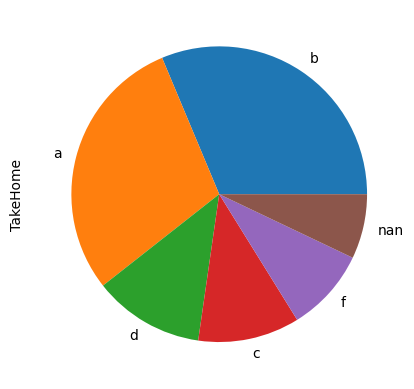

In [18]:
# pie chart
grades['TakeHome'].str.lower().value_counts(dropna=False).plot.pie()

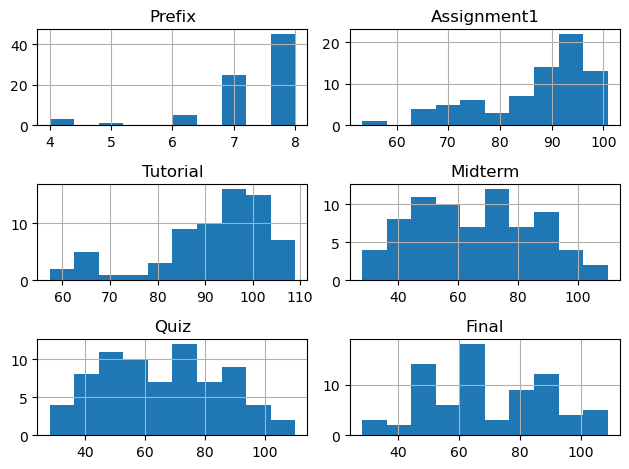

In [19]:
# show histograms
import matplotlib.pyplot as plt

X_train.hist()
plt.tight_layout()

## Measures of Center
* Mean
* Median
* Mode

And the Normal Distribution: https://www.mathsisfun.com/data/standard-normal-distribution.html

In [20]:
# mean, median, mode
import numpy as np

print('mean:', int(np.mean(X_train['Assignment1'])))
print('mean:', int(X_train['Assignment1'].mean()))
print('median:', int(X_train['Assignment1'].median()))
print('mode:', X_train['TakeHome'].mode())
print('mode:', X_train['TakeHome'].mode()[0])

mean: 87
mean: 87
median: 91
mode: 0    A
1    B
Name: TakeHome, dtype: object
mode: A


In [21]:
X_train['TakeHome'].value_counts()

B    24
A    24
D    10
C     8
F     8
a     1
Name: TakeHome, dtype: int64

### Jelly Beans, The Wisdom of the Crowd, The Median

<img src='Jelly Beans.PNG' alt='Guess the Number of Jelly Beans' />

### Imputing Missing Values

In [22]:
X_train.isnull().sum()

Prefix          0
Assignment1     4
Tutorial       10
Midterm         5
Quiz            5
Final           3
TakeHome        4
BiLabel         0
dtype: int64

In [23]:
# replace missing values with mean
X_train['Assignment1'].fillna(X_train['Assignment1'].round(decimals=2).mean(), inplace=True)
X_train.isnull().sum()

Prefix          0
Assignment1     0
Tutorial       10
Midterm         5
Quiz            5
Final           3
TakeHome        4
BiLabel         0
dtype: int64

In [24]:
# replace missing values for Tutorial, Midterm, Quiz, and Final using the example above

In [25]:
# mean, median, mode
print('mean:', X_train['Assignment1'].mean())
print('median:', X_train['Assignment1'].median())
print('mode:', int(X_train['Assignment1'].mode()))

mean: 87.16920000000003
median: 90.74
mode: 87


## Measures of Spread

### Variance

Equation for mean:<br />
$\mu = \frac{1}{N} \sum_{i=1}^{N} x_i$

https://www.statology.org/sample-variance-vs-population-variance/<br />
Equation for population variance:<br />
$\sigma^2 = \frac{1}{N}\sum({x}-\bar{x})^2$

Equation for sample variance:<br />
$s^2 = \frac{1}{n-1}\sum({x}-\bar{x})^2$

Equation for standard deviation:<br />
$\sigma = \sqrt{\frac{1}{N}\sum(x-\bar{x})^2}$

In [29]:
# Assignment variance and standard deviation
print('Population variance:', X_train['Assignment1'].var(ddof=0))
print('Sample variance:', X_train['Assignment1'].var(ddof=1))
print('Population std dev:', X_train['Assignment1'].std(ddof=0))
print('Sample std dev:', X_train['Assignment1'].std(ddof=1))
print('Square root of sample variance:', np.sqrt(X_train['Assignment1'].var()))
print('Square root of sample variance:', X_train['Assignment1'].var()**(1/2))

Population variance: 104.7516196455696
Sample variance: 106.09458912820512
Population std dev: 10.234823869787384
Sample std dev: 10.300222770804771
Square root of sample variance: 10.300222770804771
Square root of sample variance: 10.300222770804771


### Quartiles

https://en.wikipedia.org/wiki/Interquartile_range

Interquartile range<br />
Whiskers<br />

Outliers<br />
Fence<br />
https://www.statisticshowto.com/upper-and-lower-fences/

Boxplots<br />
Violin plots

<AxesSubplot: >

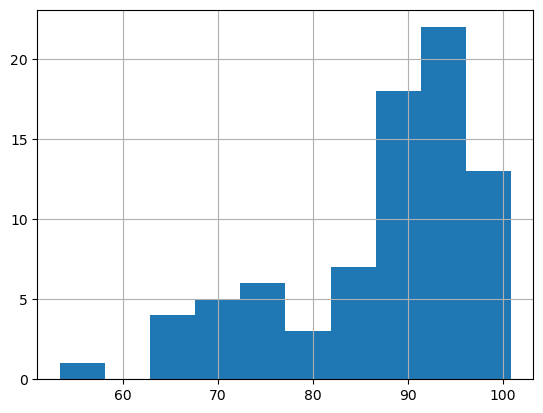

In [30]:
# Assignment histogram
X_train['Assignment1'].hist()

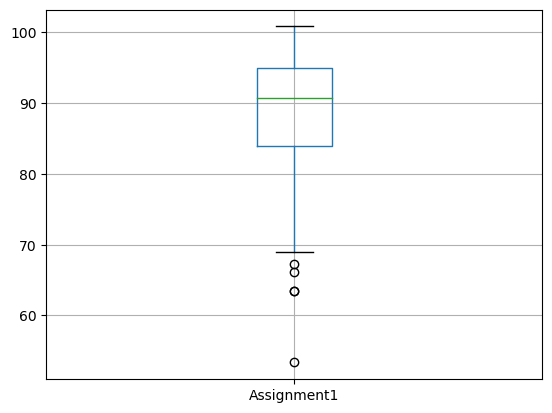

In [31]:
# Assignment boxplot
X_train.boxplot(column=['Assignment1']);

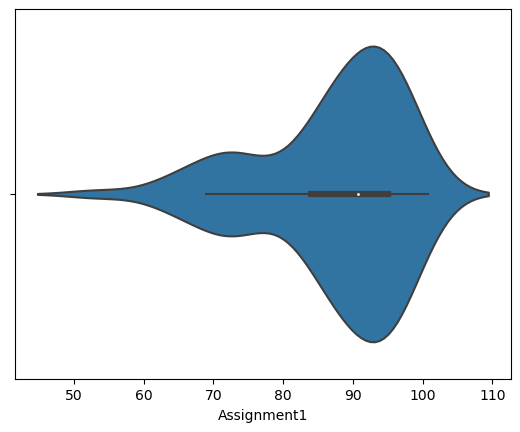

In [32]:
# Assignment violinplot
import seaborn as sns

sns.violinplot(x=X_train['Assignment1']);

## Measures of Shape

https://www.analyticsvidhya.com/blog/2021/05/shape-of-data-skewness-and-kurtosis/

**Skewness**
* Skewed right
* Skewed left

**Kurtosis**
* Mesokurtic
* Leptokurtic
* Platykurtic

mean before outliers: -0.10384651739409385
var before outliers: 0.8165221946938582


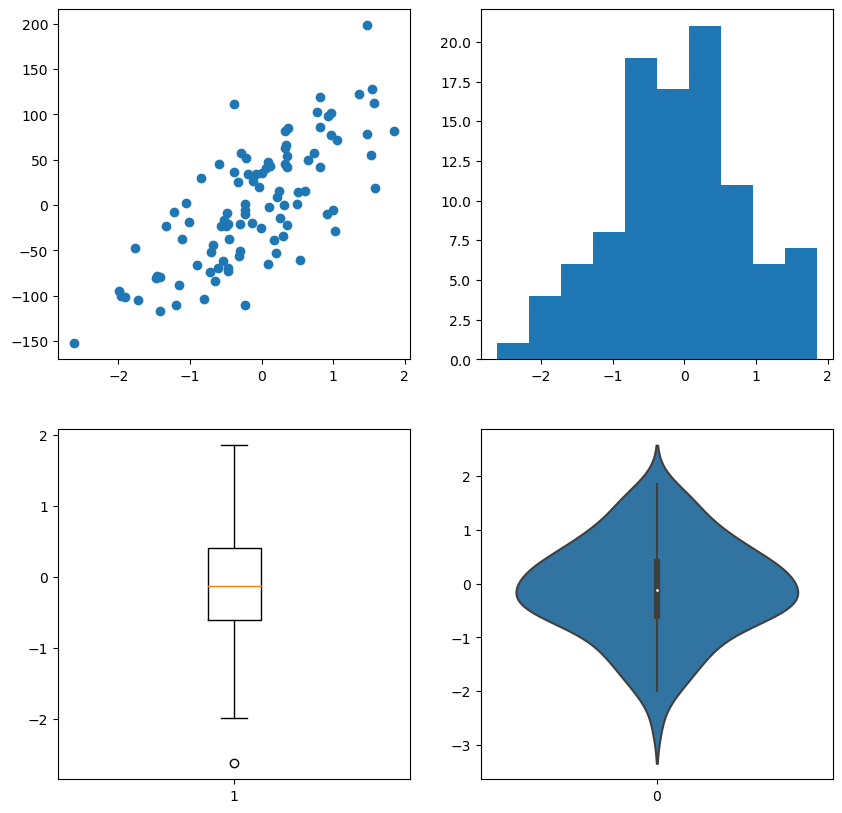

In [33]:
# visualize outliers before and after
from random import random
from random import randint
from sklearn.datasets import make_regression

X, y = make_regression(n_samples=100, n_features=1, noise=50, random_state=42)
print('mean before outliers:', np.mean(X))
print('var before outliers:', np.var(X))
fig, ([ax1, ax2], [ax3, ax4]) = plt.subplots(2, 2, figsize=(10, 10))
ax1.scatter(X, y)
ax2.hist(X)
ax3.boxplot(X)
sns.violinplot(ax=ax4, data=X);

mean after outliers: 0.00454247355036048
var after outliers: 2.867671132740934


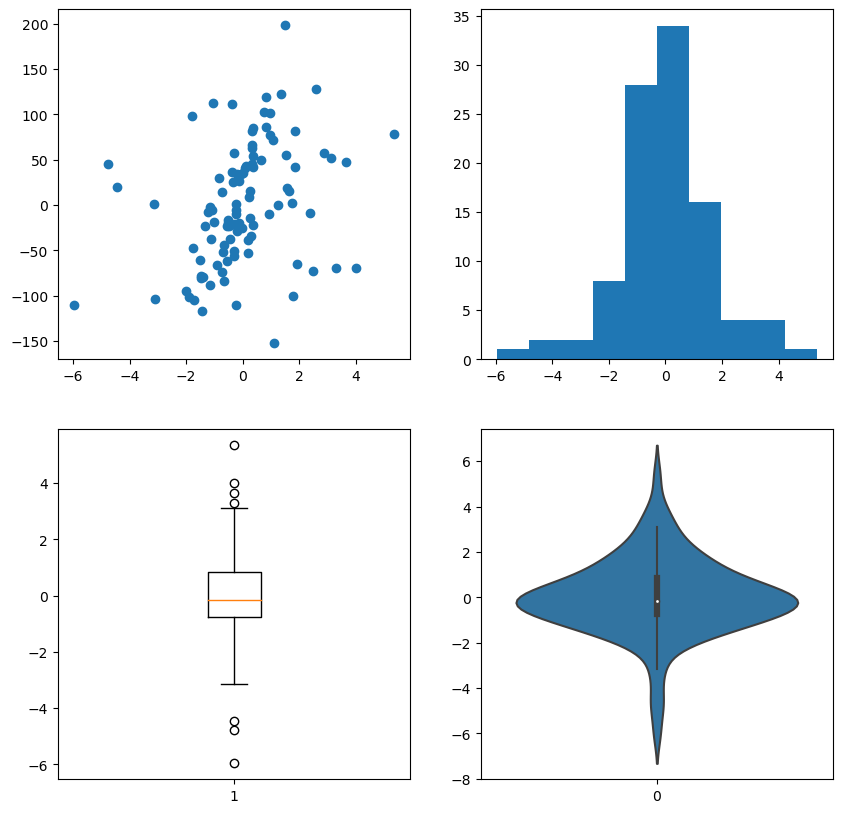

In [34]:
# create outliers
for i in range(30):
    factor = randint(-3, 3)
    if random() > 0.5:
        X[i] += factor * X.std()
    else:
        X[i] -= factor * X.std()

fig, ([ax1, ax2], [ax3, ax4]) = plt.subplots(2, 2, figsize=(10, 10))
ax1.scatter(X, y)
ax2.hist(X)
ax3.boxplot(X)
sns.violinplot(ax=ax4, data=X)
print('mean after outliers:', np.mean(X))
print('var after outliers:', np.var(X))

### Skewed data

https://www.itl.nist.gov/div898/handbook/eda/section3/eda33e6.htm

Occur due to upper or lower bounds on the data<br />
https://www.mathsisfun.com/definitions/upper-bound.html<br />
Mean, Median, and Mode should be mentioned because there is no center in the usual sense<br />

**Right Skewed**
* Tail is on the right side
* Mode Median Mean
* Data have a lower bound

**Left Skewed**
* Tail is on the left 
* Mean Median Mode
* Data have an upper bound

<AxesSubplot: >

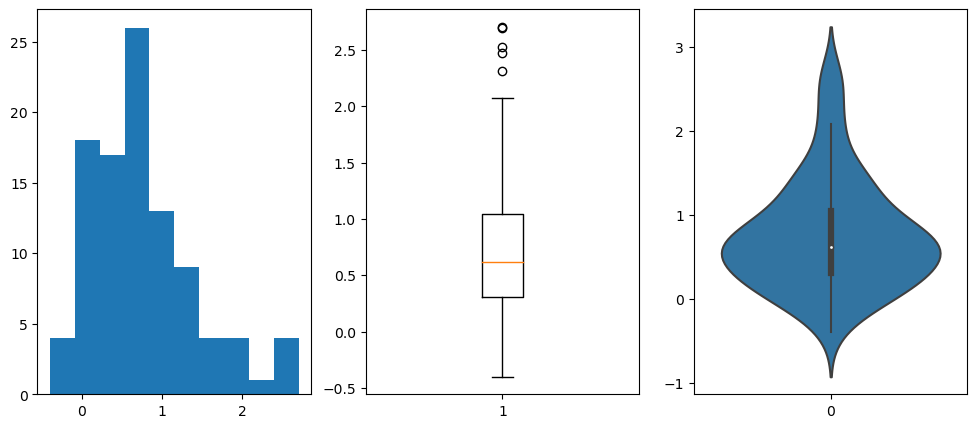

In [35]:
# creating skewed data
# https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.skewnorm.html
from scipy.stats import skewnorm

a = 4 # skewness parameter: positive values are right skewed, negative values are left skewed 
X = skewnorm.rvs(a, size=100)
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(12, 5))
ax1.hist(X)
ax2.boxplot(X)
sns.violinplot(ax=ax3, data=X)

### Kurtosis

https://www.investopedia.com/terms/p/platykurtic.asp

* Mesokurtic: Extreme events are rare, resembles normal distribution
* Platykurtic: Excess kurtosis is negative (< 3) and has thinner tails. Fewer extreme events. In finance, risk-averse investors might perfer platykurtic distributions
* Leptokurtic: Excess kurtosis is greater than 3 and has fatter tails. Caused by extreme events or outliers.

According to Investopedia (2022):

> Risk-seeking investors can focus on investments whose returns follow a leptokurtic distribution, to maximize the chances of rare events—both positive and negative (para 3).

Leptokurtic Definition. (2022, February 1). In *Investopedia*. https://www.investopedia.com/terms/l/leptokurtic.asp.

-1.506167098213807


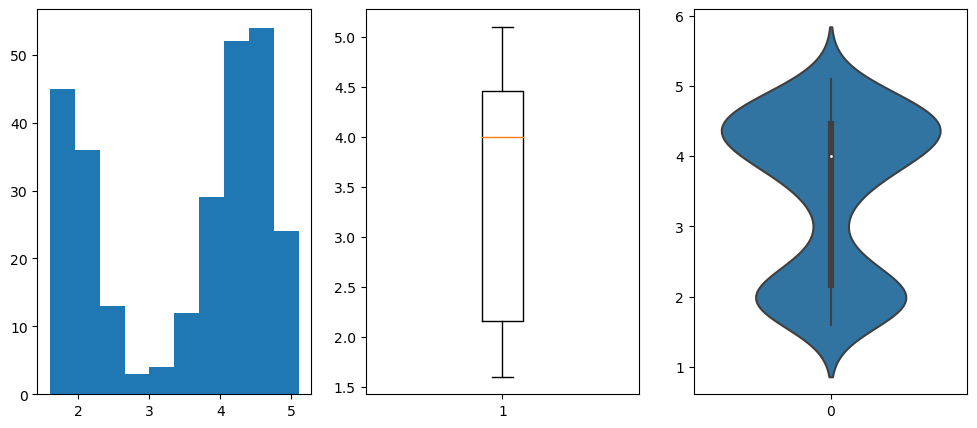

In [36]:
# platykurtic
# https://github.com/vincentarelbundock/Rdatasets/blob/master/csv/datasets/faithful.csv
faithful = pd.read_csv('faithful.csv', index_col=0)
# faithful['eruptions'].hist()
print(faithful['eruptions'].kurtosis())
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(12, 5))
ax1.hist(faithful['eruptions'])
ax2.boxplot(faithful['eruptions'])
sns.violinplot(ax=ax3, data=np.array(faithful['eruptions'].dropna()))
plt.show();
# negative indicates light tailed platykurtic

4.283885801046328


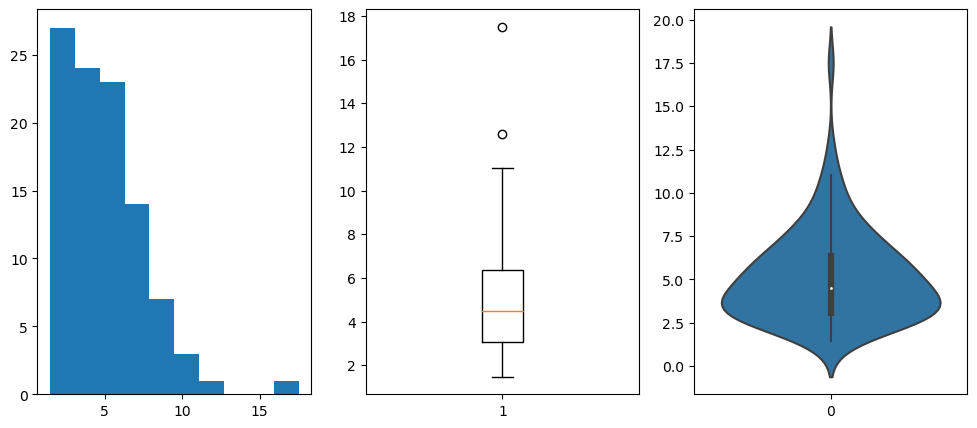

In [37]:
# leptokurtic
from scipy.stats import kurtosis # https://github.com/digitaschools

retail = pd.read_csv('Retail_Data.csv')
print(retail['Growth'].kurtosis())
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(12, 5))
ax1.hist(retail['Growth'])
ax2.boxplot(retail['Growth'])
sns.violinplot(ax=ax3, data=retail['Growth'])
plt.show();
# positive indicates light tailed leptokurtic

https://www.kaggle.com/getting-started/170781

Skewness essentially measures the symmetry of the distribution, while kurtosis determines the heaviness of the distribution tails.

The topic of Kurtosis has been controversial for decades now, the basis of kurtosis all these years has been linked with the peakedness but the ultimate verdict is that outliers (fatter tails) govern the kurtosis effect far more than the values near the mean (peak).

https://towardsdatascience.com/skewness-kurtosis-simplified-1338e094fc85

### Moments

According to Wikipedia (2022):

>  If the function is a probability distribution, then the first moment is the expected value, the second central moment is the variance, the third standardized moment is the skewness, and the fourth standardized moment is the kurtosis (para 1).

Moment (mathematics). (2022, January 31). In *Wikipedia*. https://en.wikipedia.org/wiki/Moment_(mathematics).

Mean:<br />
$\mu = \frac{1}{N} \sum_{i=1}^{N} x_i$v

Variance:<br />
$s^2 = \frac{\sum(x-\bar{x})^2}{n-1}$

Skewness:<br />
$\frac{\frac{1}{n}\sum(x - \mu)^3}{\sigma^3}$

Kurtosis:<br />
$\frac{\frac{1}{n}\sum(x - \mu)^4}{\sigma^4}$

More reading: https://gregorygundersen.com/blog/2020/04/11/moments/

### Law of Large Numbers

According to Wikipedia (2022):

>  In probability theory, the law of large numbers (LLN) is a theorem that describes the result of performing the same experiment a large number of times. According to the law, the average of the results obtained from a large number of trials should be close to the expected value and tends to become closer to the expected value as more trials are performed (para 1).

Law of large numbers. (2022, February 1). In *Wikipedia*. https://en.wikipedia.org/wiki/Law_of_large_numbers.

Guarantees stable long-term results for the averages of some random events

In [38]:
# find the mean of a large distribution
from numpy import random

np.random.seed(42)

data = random.randint(0, 5000, 5000)
np.mean(data)

2526.474

In [39]:
# find sample means from generated list
sample = np.random.choice(data, 5)
print(np.mean(sample))
sample = np.random.choice(data, 50)
print(np.mean(sample))
sample = np.random.choice(data, 500)
print(np.mean(sample))
sample = np.random.choice(data, 1000)
print(np.mean(sample))

2449.8
2749.86
2544.07
2564.941


### Central Limit Theorem

According to Wikipedia (2022):

>  In probability theory, the central limit theorem (CLT) establishes that, in many situations, when independent random variables are summed up, their properly normalized sum tends toward a normal distribution (informally a bell curve) even if the original variables themselves are not normally distributed. The theorem is a key concept in probability theory because it implies that probabilistic and statistical methods that work for normal distributions can be applicable to many problems involving other types of distributions (para 1).

Central limit theorem. (2022, February 1). In *Wikipedia*. https://en.wikipedia.org/wiki/Central_limit_theorem.

965.3982643491357


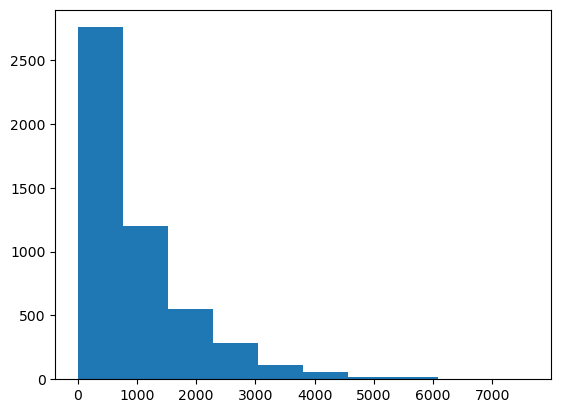

In [40]:
# https://levelup.gitconnected.com/large-numbers-and-central-limit-theorem-using-numpy-1c8199ef63b1
# create right skewed data

data = np.random.gamma(1, 1000, 5000)
plt.hist(data);
print(np.mean(data))

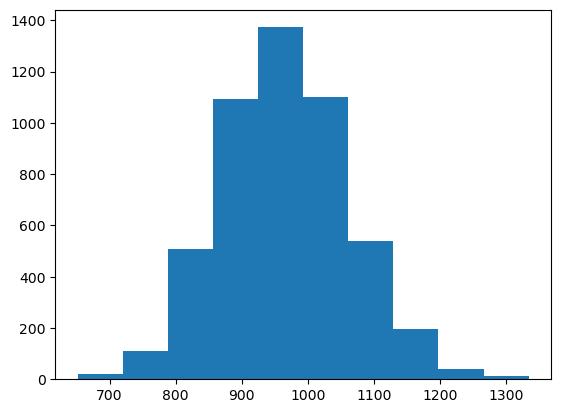

In [41]:
# visualize 100 sample means and histogram
means = []
for i in range(5000):
    means.append(np.random.choice(data, 100).mean())
    
plt.hist(means);

### Correlation

# https://www.tylervigen.com/spurious-correlations

According to Wikipedia (2022):

>  In statistics, correlation or dependence is any statistical relationship, whether causal or not, between two random variables or bivariate data. In the broadest sense correlation is any statistical association, though it actually refers to the degree to which a pair of variables are linearly related. Familiar examples of dependent phenomena include the correlation between the height of parents and their offspring, and the correlation between the price of a good and the quantity the consumers are willing to purchase... Correlations - 2 are useful because they can indicate a predictive relationship that can be exploited in practice (paras. 1 - 2).

Correlation. (2022, February 1). In *Wikipedia*. https://en.wikipedia.org/wiki/Correlation.

Correlation does not cause causation. Warm days on the beach, ice cream, and shark bites.

Covariance:<br />
$cov(x, y) = \frac{1}{N} \sum_{i=1}^{N}(x_i - \bar{x}) (y_i - \bar{y})$

* Shows how variables change together
* A measure of correlation
* Measures direction

Pearson’s r (correlation coefficient):<br />
$\rho_{x,y} = \frac{cov(x,y)}{\sigma_x\sigma_y} = \frac{\frac{1}{N}\sum(x-\bar{x})(y-\bar{y})}{\sqrt\frac{\sum(x-\bar{x})^2}{N}\sqrt\frac{\sum(y-\bar{y})^2}{N}}  = \frac{\sum(x-\bar{x})(y-\bar{y})}{\sqrt{\sum(x-\bar{x})^2}\sqrt{\sum(y-\bar{y})^2}}$

* Shows linear relationship between two continuous variables
* How one variable changes as another variable changes
* Measures both strength and direction

https://statistics.laerd.com/statistical-guides/pearson-correlation-coefficient-statistical-guide.php<br />
https://www.mygreatlearning.com/blog/covariance-vs-correlation/

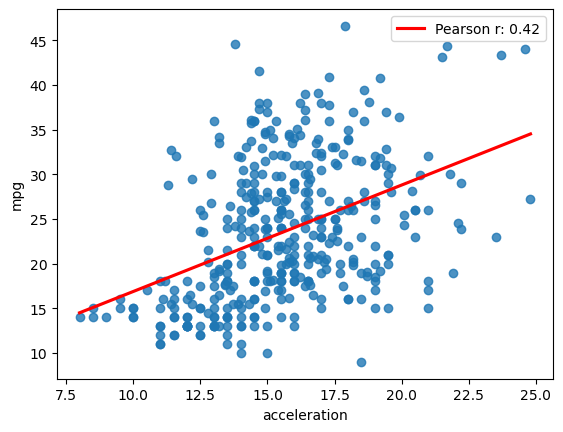

In [42]:
import seaborn as sns
from scipy import stats

mpg = sns.load_dataset('mpg')

sns.regplot(x='acceleration', y='mpg', data=mpg, ci=None,
            line_kws={'color': 'red', 'label': f'Pearson r: {round(stats.pearsonr(mpg["acceleration"], mpg["mpg"])[0], 2)}'})

plt.legend()
plt.show()

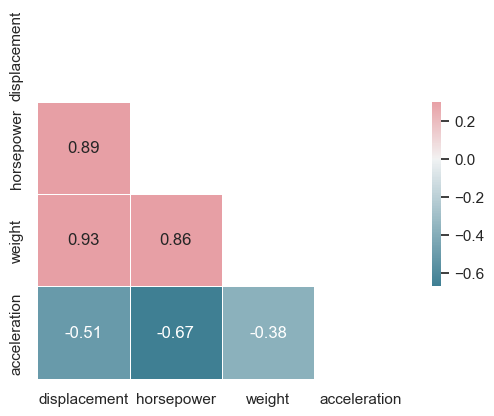

In [43]:
# correlation heat map
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(mpg.drop(['mpg', 'cylinders', 'model_year'], axis=1), mpg['mpg'], test_size=.2, random_state=42)

# Ccorrelation matrix
sns.set(style="white")

# compute the correlation matrix
corr = X_train.corr()

# generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=bool)
mask[np.triu_indices_from(mask)] = True

# set up the matplotlib figure
f, ax = plt.subplots()

# generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5}, annot=True);

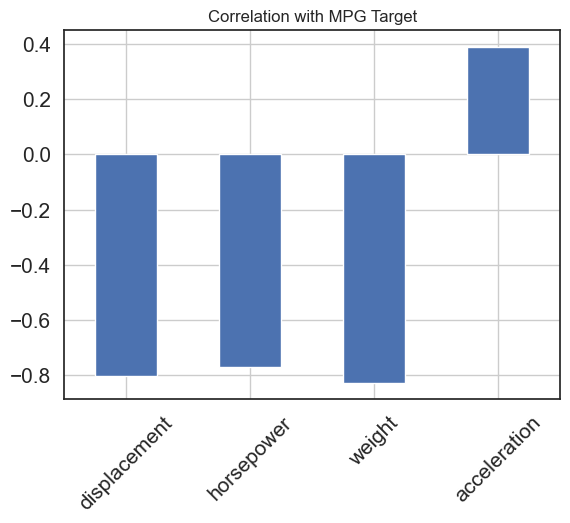

In [44]:
# showing correlation of multiple features with one target
X_train.corrwith(y_train).plot.bar(
        title = "Correlation with MPG Target", fontsize = 15,
        rot = 45, grid = True);